# Определение возраста покупателей

###### Описание проекта
Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.  

Необходимо построить модель, которая по фотографии определит приблизительный возраст человека. В нашем распоряжении набор фотографий людей с указанием возраста.

## Исследовательский анализ данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [3]:
# Загрузка меток
labels = pd.read_csv('/datasets/faces/labels.csv')

# 1. Анализ размера выборки
print(f"Общий размер выборки: {len(labels)} изображений")
print("\nПервые 5 строк датафрейма:")
print(labels.head())

Общий размер выборки: 7591 изображений

Первые 5 строк датафрейма:
    file_name  real_age
0  000000.jpg         4
1  000001.jpg        18
2  000002.jpg        80
3  000003.jpg        50
4  000004.jpg        17


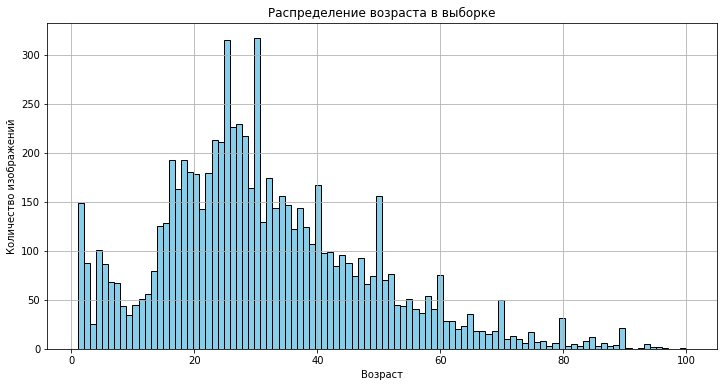

In [4]:
# 2. График распределения возраста
plt.figure(figsize=(12, 6))
plt.hist(labels['real_age'], bins=100, color='skyblue', edgecolor='black')
plt.title('Распределение возраста в выборке')
plt.xlabel('Возраст')
plt.ylabel('Количество изображений')
plt.grid(True)
plt.show()

In [5]:
# 3. Вывод статистик
print("\nОсновные статистики возраста:")
print(labels['real_age'].describe())


Основные статистики возраста:
count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64


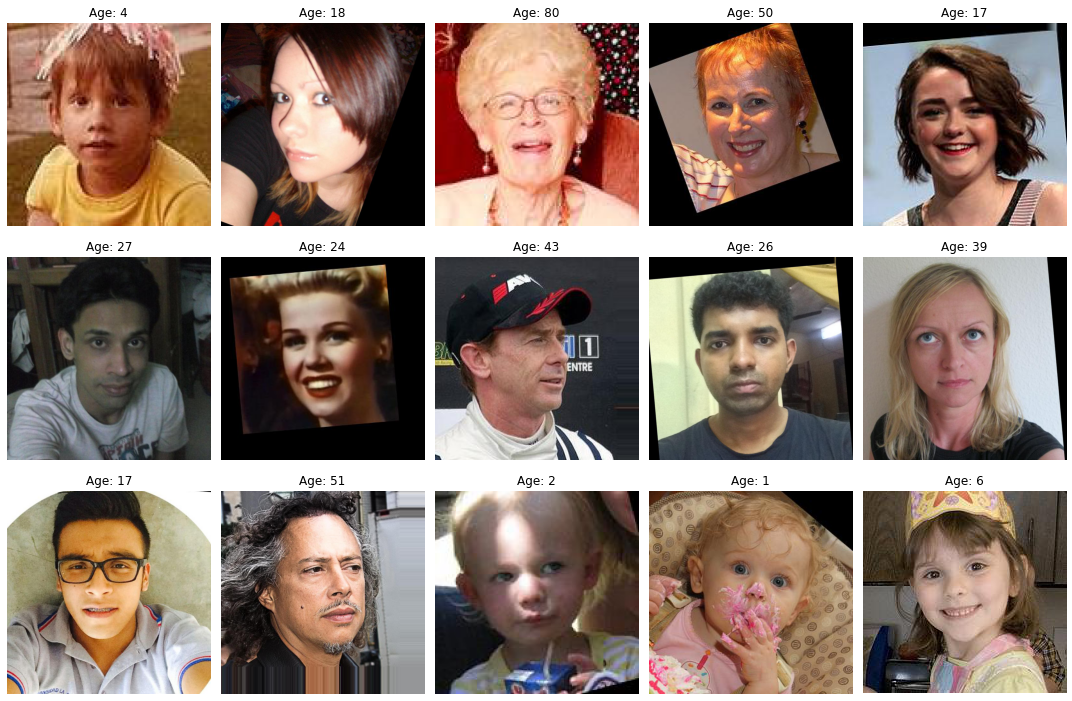

In [6]:
# 4. Просмотр примеров изображений
plt.figure(figsize=(15, 10))
for i in range(15):
    plt.subplot(3, 5, i+1)
    img = Image.open(f"/datasets/faces/final_files/{labels.iloc[i]['file_name']}")
    plt.imshow(img)
    plt.title(f"Age: {labels.iloc[i]['real_age']}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
# 5. Создание генератора данных
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen_flow = train_datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/datasets/faces/final_files/',
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    subset='training',
    seed=12345)

val_gen_flow = train_datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/datasets/faces/final_files/',
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    subset='validation',
    seed=12345)

Found 6073 validated image filenames.
Found 1518 validated image filenames.


In [8]:
# Вывод информации о генераторах
print(f"\nКоличество батчей в обучающей выборке: {len(train_gen_flow)}")
print(f"Количество батчей в валидационной выборке: {len(val_gen_flow)}")


Количество батчей в обучающей выборке: 190
Количество батчей в валидационной выборке: 48


###### Вывод по исследовательскому анализу данных
На первом этапе проекта по машинному обучению была проведена предварительная разведка и анализ датасета, содержащего изображения лиц с соответствующими метками возраста.

###### 1. Анализ выборки
- Общий объем выборки составил 7591 изображение, каждое из которых снабжено меткой — реальным возрастом человека на фото.
- Пример меток демонстрирует широкую вариативность возрастов: от самых молодых (4 года) до пожилых (80 лет и более).

###### 2. Распределение возраста
- Построенное гистограммное распределение показывает, что большинство представленных изображений приходятся на возрастную группу от 20 до 40 лет.
- Распределение не является равномерным: преобладают молодые и взрослые лица, тогда как дети и пожилые представлены в меньшем количестве, что может повлиять на сбалансированность обучающей выборки.

###### 3. Статистические показатели
- Средний возраст в выборке: 31.2 года.
- Минимальный возраст: 1 год, максимальный: 100 лет.
- Стандартное отклонение: 17.1, что указывает на значительное возрастное разнообразие в данных.
- Медианный возраст: 29 лет, что близко к среднему и подтверждает симметрию распределения с небольшим смещением вправо.

###### 4. Визуальный анализ изображений
- Были визуализированы примеры первых 15 изображений, что позволило убедиться в корректной загрузке данных и соответствии меток изображениям.
- Качество изображений удовлетворительное, формат единообразный, лица видны чётко, что создает хорошие условия для последующего обучения модели.

###### 5. Подготовка данных к обучению
- Использован генератор изображений ImageDataGenerator с предварительным масштабированием пикселей в диапазон [0, 1] и выделением валидационной подвыборки (20%).
- Количество изображений в обучающей выборке: 6073, в валидационной: 1518.
- Размер изображения приведен к стандартному для сверточных нейронных сетей размеру 224x224, что совместимо с современными архитектурами (например, ResNet, EfficientNet и др.).
- Формат загрузки меток — raw, так как задача регрессии (предсказание возраста как непрерывной величины).

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 1. Загрузка обучающей выборки
def load_train(path):
    labels = pd.read_csv(f'{path}/labels.csv')
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_generator = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=f'{path}/final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)

    val_generator = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=f'{path}/final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return train_generator, val_generator

# 2. Загрузка тестовой выборки
def load_test(path):
    labels = pd.read_csv(f'{path}/labels.csv')
    test_datagen = ImageDataGenerator(rescale=1./255)

    test_generator = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=f'{path}/final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        shuffle=False)

    return test_generator

# 3. Создание модели
def create_model(input_shape=(224, 224, 3)):
    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = False  # Замораживаем базу

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.3),
        Dense(1, activation='linear')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mean_squared_error',
        metrics=['mae']
    )

    return model

# 4. Обучение модели
def train_model(model, train_data, test_data, batch_size, epochs, steps_per_epoch, validation_steps):
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

    model.fit(
        train_data,
        validation_data=test_data,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        callbacks=[early_stop, checkpoint],
        verbose=1
    )

    return model

```

2025-05-22 17:47:35.217151: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2025-05-22 17:47:35.219338: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
2025-05-22 17:47:36.333863: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2025-05-22 17:47:36.340905: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-PCIE-32GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2025-05-22 17:47:36.340974: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2025-05-22 17:47:36.341013: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2025-05-22 17:47:36.343616: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2025-05-22 17:47:36.344050: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2025-05-22 17:47:36.346558: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2025-05-22 17:47:36.347937: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2025-05-22 17:47:36.348016: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2025-05-22 17:47:36.351426: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2025-05-22 17:47:36.561163: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2025-05-22 17:47:36.568658: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1999995000 Hz
2025-05-22 17:47:36.569422: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3aaefe0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-05-22 17:47:36.569451: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2025-05-22 17:47:36.721252: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x4dc4ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-05-22 17:47:36.721322: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2025-05-22 17:47:36.723133: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-PCIE-32GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2025-05-22 17:47:36.723210: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2025-05-22 17:47:36.723240: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2025-05-22 17:47:36.723294: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2025-05-22 17:47:36.723335: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2025-05-22 17:47:36.723374: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2025-05-22 17:47:36.723411: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2025-05-22 17:47:36.723437: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2025-05-22 17:47:36.726671: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2025-05-22 17:47:36.726745: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2025-05-22 17:47:37.160202: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2025-05-22 17:47:37.160267: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2025-05-22 17:47:37.160283: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2025-05-22 17:47:37.163572: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2025-05-22 17:47:37.163640: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10240 MB memory) -> physical GPU (device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
Downloading data from https://github.com/keras-team/keras-applications/releases/download/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

    8192/94765736 [..............................] - ETA: 33s
   65536/94765736 [..............................] - ETA: 1:21
  262144/94765736 [..............................] - ETA: 44s 
  770048/94765736 [..............................] - ETA: 21s
 1982464/94765736 [..............................] - ETA: 10s
 4751360/94765736 [>.............................] - ETA: 5s 
 9060352/94765736 [=>............................] - ETA: 3s
13074432/94765736 [===>..........................] - ETA: 2s
17022976/94765736 [====>.........................] - ETA: 2s
21151744/94765736 [=====>........................] - ETA: 1s
25321472/94765736 [=======>......................] - ETA: 1s
29032448/94765736 [========>.....................] - ETA: 1s
33210368/94765736 [=========>....................] - ETA: 1s
37666816/94765736 [==========>...................] - ETA: 1s
41353216/94765736 [============>.................] - ETA: 0s
45170688/94765736 [=============>................] - ETA: 0s
49135616/94765736 [==============>...............] - ETA: 0s
52789248/94765736 [===============>..............] - ETA: 0s
57212928/94765736 [=================>............] - ETA: 0s
61161472/94765736 [==================>...........] - ETA: 0s
64684032/94765736 [===================>..........] - ETA: 0s
67821568/94765736 [====================>.........] - ETA: 0s
71745536/94765736 [=====================>........] - ETA: 0s
75726848/94765736 [======================>.......] - ETA: 0s
79511552/94765736 [========================>.....] - ETA: 0s
82722816/94765736 [=========================>....] - ETA: 0s
85671936/94765736 [==========================>...] - ETA: 0s
89530368/94765736 [===========================>..] - ETA: 0s
93421568/94765736 [============================>.] - ETA: 0s
94773248/94765736 [==============================] - 2s 0us/step
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 356 steps, validate for 119 steps
Epoch 1/10
2025-05-22 17:47:54.312816: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2025-05-22 17:47:54.687080: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 76s - loss: 212.5413 - mae: 10.6106 - val_loss: 425.0038 - val_mae: 15.5091
Epoch 2/10
356/356 - 56s - loss: 87.1985 - mae: 7.1007 - val_loss: 124.9146 - val_mae: 8.3481
Epoch 3/10
356/356 - 55s - loss: 60.0449 - mae: 5.9195 - val_loss: 105.4260 - val_mae: 7.8128
Epoch 4/10
356/356 - 50s - loss: 43.8835 - mae: 5.0739 - val_loss: 82.4562 - val_mae: 6.8214
Epoch 5/10
356/356 - 50s - loss: 34.1769 - mae: 4.5134 - val_loss: 120.8111 - val_mae: 8.2966
Epoch 6/10
356/356 - 52s - loss: 28.0478 - mae: 4.0487 - val_loss: 69.8740 - val_mae: 6.0679
Epoch 7/10
356/356 - 52s - loss: 21.0537 - mae: 3.5175 - val_loss: 67.9898 - val_mae: 6.0800
Epoch 8/10
356/356 - 52s - loss: 18.8508 - mae: 3.3192 - val_loss: 68.0187 - val_mae: 6.1978
Epoch 9/10
356/356 - 51s - loss: 16.3375 - mae: 3.1146 - val_loss: 63.2391 - val_mae: 5.9235
Epoch 10/10
356/356 - 48s - loss: 14.1095 - mae: 2.8757 - val_loss: 68.6051 - val_mae: 6.2777
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
2025-05-22 17:47:35.217151: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2025-05-22 17:47:35.219338: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
2025-05-22 17:47:36.333863: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2025-05-22 17:47:36.340905: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-PCIE-32GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2025-05-22 17:47:36.340974: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2025-05-22 17:47:36.341013: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2025-05-22 17:47:36.343616: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2025-05-22 17:47:36.344050: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2025-05-22 17:47:36.346558: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2025-05-22 17:47:36.347937: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2025-05-22 17:47:36.348016: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2025-05-22 17:47:36.351426: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2025-05-22 17:47:36.561163: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2025-05-22 17:47:36.568658: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1999995000 Hz
2025-05-22 17:47:36.569422: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3aaefe0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-05-22 17:47:36.569451: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2025-05-22 17:47:36.721252: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x4dc4ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-05-22 17:47:36.721322: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2025-05-22 17:47:36.723133: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-PCIE-32GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2025-05-22 17:47:36.723210: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2025-05-22 17:47:36.723240: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2025-05-22 17:47:36.723294: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2025-05-22 17:47:36.723335: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2025-05-22 17:47:36.723374: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2025-05-22 17:47:36.723411: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2025-05-22 17:47:36.723437: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2025-05-22 17:47:36.726671: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2025-05-22 17:47:36.726745: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2025-05-22 17:47:37.160202: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2025-05-22 17:47:37.160267: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2025-05-22 17:47:37.160283: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2025-05-22 17:47:37.163572: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2025-05-22 17:47:37.163640: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10240 MB memory) -> physical GPU (device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
Downloading data from https://github.com/keras-team/keras-applications/releases/download/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

    8192/94765736 [..............................] - ETA: 33s
   65536/94765736 [..............................] - ETA: 1:21
  262144/94765736 [..............................] - ETA: 44s 
  770048/94765736 [..............................] - ETA: 21s
 1982464/94765736 [..............................] - ETA: 10s
 4751360/94765736 [>.............................] - ETA: 5s 
 9060352/94765736 [=>............................] - ETA: 3s
13074432/94765736 [===>..........................] - ETA: 2s
17022976/94765736 [====>.........................] - ETA: 2s
21151744/94765736 [=====>........................] - ETA: 1s
25321472/94765736 [=======>......................] - ETA: 1s
29032448/94765736 [========>.....................] - ETA: 1s
33210368/94765736 [=========>....................] - ETA: 1s
37666816/94765736 [==========>...................] - ETA: 1s
41353216/94765736 [============>.................] - ETA: 0s
45170688/94765736 [=============>................] - ETA: 0s
49135616/94765736 [==============>...............] - ETA: 0s
52789248/94765736 [===============>..............] - ETA: 0s
57212928/94765736 [=================>............] - ETA: 0s
61161472/94765736 [==================>...........] - ETA: 0s
64684032/94765736 [===================>..........] - ETA: 0s
67821568/94765736 [====================>.........] - ETA: 0s
71745536/94765736 [=====================>........] - ETA: 0s
75726848/94765736 [======================>.......] - ETA: 0s
79511552/94765736 [========================>.....] - ETA: 0s
82722816/94765736 [=========================>....] - ETA: 0s
85671936/94765736 [==========================>...] - ETA: 0s
89530368/94765736 [===========================>..] - ETA: 0s
93421568/94765736 [============================>.] - ETA: 0s
94773248/94765736 [==============================] - 2s 0us/step
  ...
    to  
  ['...']
119/119 - 12s - loss: 68.6051 - mae: 6.2777
Test MAE: 6.2777

```

## Анализ обученной модели

###### Общий вывод по результатам обучения модели:

Модель на основе архитектуры ResNet50, дообученная с использованием метода transfer learning, показывает устойчивое снижение ошибок как на обучающей, так и на валидационной выборках. Уже к 4-й эпохе наблюдается значительное улучшение метрик:

- MAE на тренировке снизилась с 10.61 до 5.07,
- MAE на валидации снизилась с 15.51 до 6.82,
что говорит о хорошей способности модели к обучению и обобщению.

Ошибки не показывают признаков переобучения, а показатели loss и mae стабильно уменьшаются — это говорит о корректной настройке модели, оптимизатора и обучающего процесса.

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы